### Spam Emails Classification 


Build a spam email classifier using supervised or unsupervised machine learning techniques and also test the models interpretability and test the reliability using different scoring techniques

In [1]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = "./SpamDetection"

labels = []
texts = []

for label in os.listdir(data_path):
    directory = f"{data_path}/{label}"
    for file in os.listdir(directory):
        try:
            file_path = f"{directory}/{file}"
            with open(file_path,'r') as f:
                text = f.read()
                f.close()
            # push to df
            texts.append(text)
            labels.append(label)
        except:
            print(f"Error parsing: {file}")
df = pd.DataFrame({"labels":labels, "texts": texts})
df.head()

Error parsing: 00116.29e39a0064e2714681726ac28ff3fdef
Error parsing: 00263.13fc73e09ae15e0023bdb13d0a010f2d
Error parsing: 00320.20dcbb5b047b8e2f212ee78267ee27ad
Error parsing: 00323.9e36bf05304c99f2133a4c03c49533a9
Error parsing: 00324.6f320a8c6b5f8e4bc47d475b3d4e86ef
Error parsing: 00500.85b72f09f6778a085dc8b6821965a76f
Error parsing: 01065.9ecef01b01ca912fa35453196b4dae4c
Error parsing: 01227.04a4f94c7a73b29cb56bf38c7d526116
Error parsing: 01376.73e738e4cd8121ce3dfb42d190b193c9


,labels,texts
0,ham,Return-Path: <exmh-workers-admin@spamassassin....
1,ham,From exmh-workers-admin@redhat.com Thu Aug 22...
2,ham,Return-Path: Fool@motleyfool.com\nDelivery-Dat...
3,ham,From exmh-workers-admin@redhat.com Wed Aug 21...
4,ham,From Steve_Burt@cursor-system.com Thu Aug 22 ...


In [3]:
df.shape

(8588, 2)

### Pre-Processing

In [4]:
"""
@author: Abhi Patel
@refrences:
 - https://docs.python.org/3/library/email.message.html
"""

from email.parser import BytesParser, Parser
from email.policy import default 
from tqdm import tqdm


def get_email_headers(emails, df):
    
    email_from = []
    email_to = []
    email_subject = []
    email_content_type = []
    
    email_body = []
    email_body_len = []
    
    sender_hostname = []
    sender_email = []
    has_attachments = []
    
    
    for email in tqdm(emails):
        
        parser = Parser(policy=default).parsestr(email)
        
        try:
            # headers

            email_from.append(parser['from'])
            email_to.append(parser['to'])
            email_subject.append(parser['subject'])
            email_content_type.append(parser.get_content_type())

            # attachments
            
            has_attachments.append(parser.is_attachment())
        
            # email body - body content for most emails starts from a second line break after headers
            
            email_body_arr = email.split("\n")
            empty_indexer = 0
            email_text = "" 
            
            for idx, line in enumerate(email_body_arr):
                if len(line) == 0:
                    empty_indexer += 1
                    continue
                    
                if empty_indexer > 0:
                    email_text = "\n".join(email_body_arr[idx:]).replace("\n"," ").strip()
                    break
            
            email_body.append(email_text)
            email_body_len.append(len(email_text))
            
            # email server

            sender_info = parser['from'].split(' ')[-1:][0].replace("<","").replace(">","").strip()
            if not len(sender_info) == 0:
                sender_parsed = sender_info.split("@")
                sender_hostname.append(sender_parsed[1])
                sender_email.append(sender_parsed[0])
            else:
                sender_hostname.append(None)
                sender_email.append(None)
                
        except Exception as e:
    
            email_body.append(None)
            sender_hostname.append(None)      
            sender_email.append(None)

    df['from'] = email_from
    df['subject'] = email_subject
    df['content_type'] = email_content_type
    df['sender_host'] = sender_hostname
    df['sender_email'] = sender_email
    df['has_attachments'] = has_attachments
    df['body'] = email_body 
    
    
    df['email_body_len'] = email_body_len
    
get_email_headers(df['texts'].values, df)

100%|█████████████████████████████████████████████████████████████████████████████| 8588/8588 [00:12<00:00, 708.06it/s]


In [5]:
df['body'].values[100]

'On Sat, 20 Jul 2002 12:06:35 BST, Greg Farrel said: > >D\'oh. I ment to say that I cant use a laptop, as I have a pci wireless >card and the cable for it (about 180 dollars). So it has to be a pc, with >a pci 2.2 connector (ie some pentiums, and anything above)  There\'s some place in the UK that sells loads of silent gear... can\'t remember the name though... a google for "silent pc" or the like should turn it up.  --  \tNiall  --  Irish Linux Users\' Group Social Events: social@linux.ie http://www.linux.ie/mailman/listinfo/social for (un)subscription information. List maintainer: listmaster@linux.ie'

In [6]:
df.head()

,labels,texts,from,subject,content_type,sender_host,sender_email,has_attachments,body,email_body_len
0,ham,Return-Path: <exmh-workers-admin@spamassassin....,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,text/plain,munnari.OZ.AU,kre,False,"Date: Tue, 20 Aug 2002 17:27:47 -0500 ...",6747
1,ham,From exmh-workers-admin@redhat.com Thu Aug 22...,Robert Elz <kre@munnari.OZ.AU>,Re: New Sequences Window,text/plain,munnari.OZ.AU,kre,False,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",1598
2,ham,Return-Path: Fool@motleyfool.com\nDelivery-Dat...,The Motley Fool <Fool@motleyfool.com>,Personal Finance: Resolutions You Can Keep,text/plain,motleyfool.com,Fool,False,======================== THE MOTLEY FOOL =====...,7048
3,ham,From exmh-workers-admin@redhat.com Wed Aug 21...,Chris Garrigues <cwg-exmh@DeepEddy.Com>,Re: New Sequences Window,multipart/signed,DeepEddy.Com,cwg-exmh,False,--==_Exmh_-199405358P Content-Type: text/plain...,1533
4,ham,From Steve_Burt@cursor-system.com Thu Aug 22 ...,Steve Burt <Steve_Burt@cursor-system.com>,[zzzzteana] RE: Alexander,text/plain,cursor-system.com,Steve_Burt,False,"Martin A posted: Tassos Papadopoulos, the Gree...",894


### Exploratory Data Analysis

<AxesSubplot:>

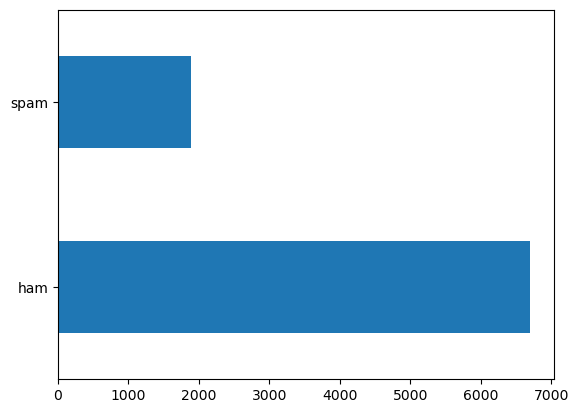

In [7]:
df['labels'].value_counts().plot(kind="barh")

<AxesSubplot:>

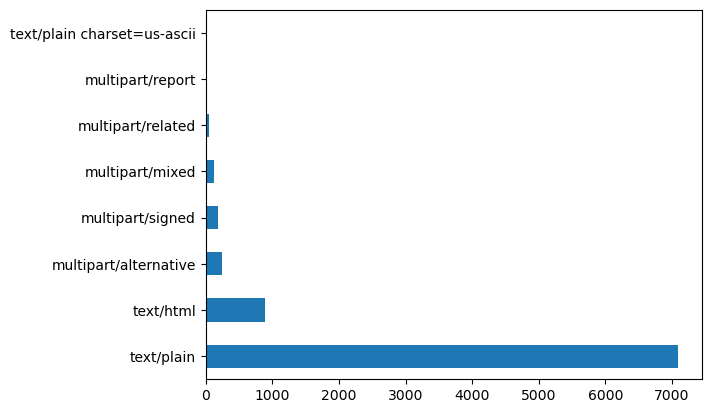

In [8]:
df.content_type.value_counts().plot(kind="barh")

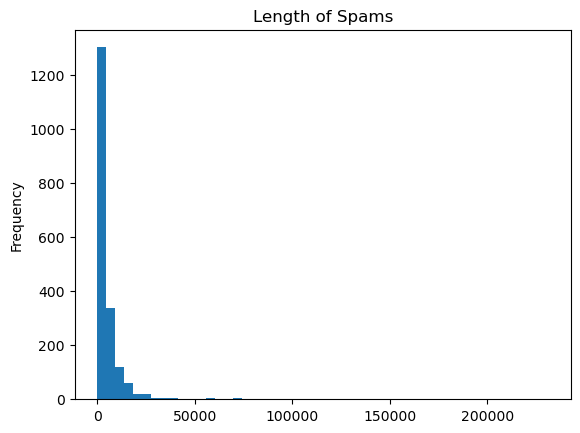

In [9]:
df.query("labels == 'spam'")['email_body_len'].plot(kind="hist",bins=50, title="Length of Spams")
plt.show()

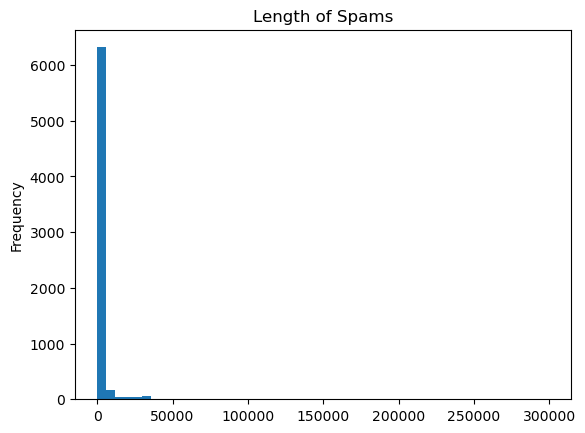

In [10]:
df.query("labels == 'ham'")['email_body_len'].plot(kind="hist",bins=50, title="Length of Spams")
plt.show()

### Cleaning

In [11]:
df.isna().sum()

labels             0
texts              0
from               0
subject            6
content_type       0
sender_host        6
sender_email       6
has_attachments    0
body               0
email_body_len     0
dtype: int64

In [12]:
# inspecting missing subjects and what category do they belong to

df[df['subject'].isna()]

,labels,texts,from,subject,content_type,sender_host,sender_email,has_attachments,body,email_body_len
541,ham,From owner-melbwireless@wireless.org.au Mon A...,Vincent Chin <nukiez@hotmail.com>,None,text/plain,hotmail.com,nukiez,False,Ripped from http://www.hpl.hp.com/personal/Je...,2277
2931,ham,From mail@dogma.slashnull.org Mon Jul 22 17:2...,mail <mail@dogma.slashnull.org>,None,text/plain,dogma.slashnull.org,mail,False,Problem with spamtrap /home/yyyy/lib/spamtrap....,117
2933,ham,From mail@dogma.slashnull.org Mon Jul 22 17:2...,mail <mail@dogma.slashnull.org>,None,text/plain,dogma.slashnull.org,mail,False,Problem with spamtrap /home/yyyy/lib/spamtrap....,117
2937,ham,From mail@dogma.slashnull.org Mon Jul 22 17:2...,mail <mail@dogma.slashnull.org>,None,text/plain,dogma.slashnull.org,mail,False,Problem with spamtrap /home/yyyy/lib/spamtrap....,117
3046,ham,From nobody@sonic.spamtraps.taint.org Fri Aug...,nobody@sonic.spamtraps.taint.org,None,text/plain,sonic.spamtraps.taint.org,nobody,False,Problem with spamtrap Could not lock /home/yyy...,151
3096,ham,From nobody@sonic.spamtraps.taint.org Wed Aug...,nobody@sonic.spamtraps.taint.org,None,text/plain,sonic.spamtraps.taint.org,nobody,False,Problem with spamtrap Could not lock /home/yyy...,150


In [13]:
# drop the rows since its only 6 of them
df = df.dropna()

### Encoding

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 0 to 8587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   labels           8576 non-null   object
 1   texts            8576 non-null   object
 2   from             8576 non-null   object
 3   subject          8576 non-null   object
 4   content_type     8576 non-null   object
 5   sender_host      8576 non-null   object
 6   sender_email     8576 non-null   object
 7   has_attachments  8576 non-null   bool  
 8   body             8576 non-null   object
 9   email_body_len   8576 non-null   int64 
dtypes: bool(1), int64(1), object(8)
memory usage: 678.4+ KB


In [15]:
from sklearn.preprocessing import LabelBinarizer 

label_binarizer = LabelBinarizer()
df['labels_encoded'] = label_binarizer.fit_transform(df['labels'])

- 0 is Ham
- 1 is Spam

In [16]:
from sklearn.preprocessing import LabelEncoder

# email from
df['from_encoded'] = LabelEncoder().fit_transform(df['from'])

# content type
df['content_type_encoded'] = LabelEncoder().fit_transform(df['content_type'])

# sender_host
df['sender_host_encoded'] = LabelEncoder().fit_transform(df['sender_host'])

# sender email
df['sender_email_encoded'] = LabelEncoder().fit_transform(df['sender_email'])

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df['body'].values
vectorizer = TfidfVectorizer(use_idf=True)
tfidf_body = vectorizer.fit_transform(corpus)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['body'].values
count_vectorizer = CountVectorizer()
countvecs_body = count_vectorizer.fit_transform(corpus)

### Feature Selection

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 0 to 8587
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   labels                8576 non-null   object
 1   texts                 8576 non-null   object
 2   from                  8576 non-null   object
 3   subject               8576 non-null   object
 4   content_type          8576 non-null   object
 5   sender_host           8576 non-null   object
 6   sender_email          8576 non-null   object
 7   has_attachments       8576 non-null   bool  
 8   body                  8576 non-null   object
 9   email_body_len        8576 non-null   int64 
 10  labels_encoded        8576 non-null   int32 
 11  from_encoded          8576 non-null   int32 
 12  content_type_encoded  8576 non-null   int32 
 13  sender_host_encoded   8576 non-null   int32 
 14  sender_email_encoded  8576 non-null   int32 
dtypes: bool(1), int32(5), int64(1), object

In [21]:
from scipy.sparse import hstack

features = ['email_body_len','from_encoded','content_type_encoded','sender_host_encoded','sender_email_encoded']

Y = df['labels_encoded'].values
X = df[features].values

# stack tfidf and X
X_TFIDF = hstack([tfidf_body, X]) # for tfidf
X_CV = hstack([countvecs_body, X]) # for count vectorizer

### Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

# tfidf
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(X_TFIDF, Y, shuffle=True)

# count vectorizer
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(X_CV, Y, shuffle=True)

In [23]:
x_train_tf.shape, y_train_tf.shape, x_test_tf.shape, y_test_tf.shape

((6432, 122906), (6432,), (2144, 122906), (2144,))

In [24]:
x_train_cv.shape, y_train_cv.shape, x_test_cv.shape, y_test_cv.shape

((6432, 122906), (6432,), (2144, 122906), (2144,))

### Modelling

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#### Random Forest  - TFIDF

In [26]:
from sklearn.ensemble import RandomForestClassifier

rclf = RandomForestClassifier()
rclf.fit(x_train_tf, y_train_tf)
rclf.score(x_test_tf, y_test_tf)

0.9799440298507462

In [27]:
preds = rclf.predict(x_test_tf)
print(classification_report(y_test_tf,preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1690
           1       0.99      0.92      0.95       454

    accuracy                           0.98      2144
   macro avg       0.98      0.96      0.97      2144
weighted avg       0.98      0.98      0.98      2144



<AxesSubplot:>

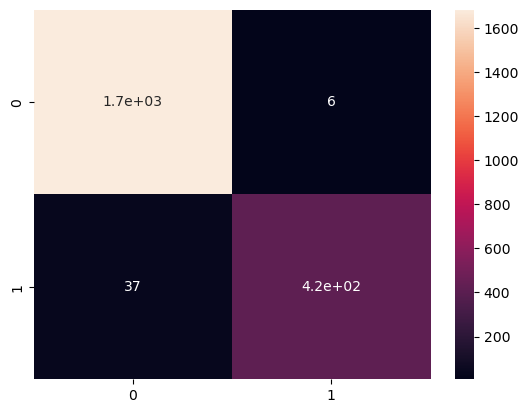

In [28]:
sns.heatmap(confusion_matrix(y_test_tf, preds), annot=True)

#### Random Forest - Count Vectorizer

In [29]:
rclf_cv = RandomForestClassifier()
rclf_cv.fit(x_train_cv, y_train_cv)
rclf_cv.score(x_test_cv, y_test_cv)

0.9776119402985075

In [30]:
print(classification_report(y_test_cv,rclf_cv.predict(x_test_cv)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1677
           1       0.97      0.92      0.95       467

    accuracy                           0.98      2144
   macro avg       0.98      0.96      0.97      2144
weighted avg       0.98      0.98      0.98      2144



<AxesSubplot:>

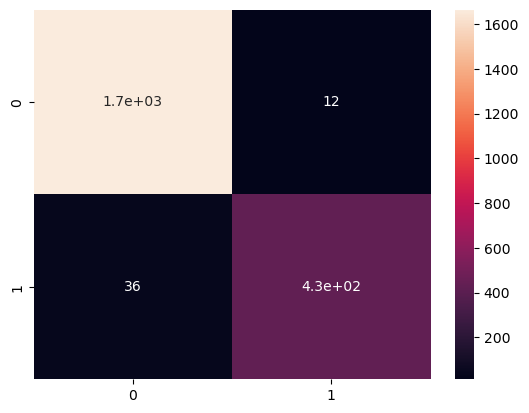

In [31]:
sns.heatmap(confusion_matrix(y_test_cv, rclf_cv.predict(x_test_cv)), annot=True)

#### Random Forest ROC Comparison

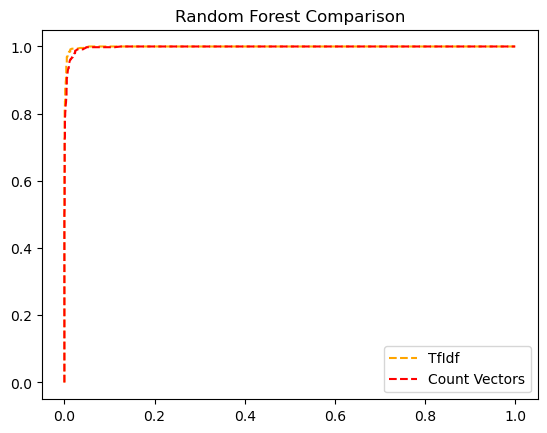

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
rclf_tfidf_prob = rclf.predict_proba(x_test_tf)
rclf_cv_prob = rclf_cv.predict_proba(x_test_cv)


fpr1, tpr1, thresh1 = roc_curve(y_test_tf, rclf_tfidf_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_cv, rclf_cv_prob[:,1], pos_label=1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange',label="TfIdf")
plt.plot(fpr2, tpr2, linestyle='--',color='red',label="Count Vectors")
plt.title("Random Forest Comparison")

plt.legend()
plt.show()


In [33]:
rclf_tfidf_auc = roc_auc_score(y_test_tf, rclf_tfidf_prob[:,1])
rclf_cv_auc = roc_auc_score(y_test_cv, rclf_cv_prob[:,1])

print(rclf_tfidf_auc, rclf_tfidf_auc)

0.9988915100487449 0.9988915100487449


#### Support Vector Machines - TFIDF

In [34]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train_tf, y_train_tf)
svc.score(x_test_tf, y_test_tf)

0.8255597014925373

In [35]:
preds = svc.predict(x_test_tf)
print(classification_report(y_test_tf,preds))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1690
           1       0.72      0.29      0.41       454

    accuracy                           0.83      2144
   macro avg       0.78      0.63      0.65      2144
weighted avg       0.81      0.83      0.79      2144



<AxesSubplot:>

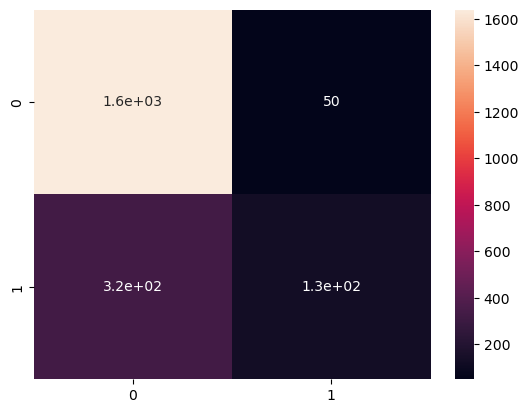

In [36]:
sns.heatmap(confusion_matrix(y_test_tf, preds), annot=True)

#### Support Vector Machines - Count Vectorizer

In [37]:
svc_cf = SVC(probability=True)
svc_cf.fit(x_train_cv, y_train_cv)
svc_cf.score(x_test_cv, y_test_cv)

0.8152985074626866

In [38]:
print(classification_report(y_test_cv,rclf_cv.predict(x_test_cv)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1677
           1       0.97      0.92      0.95       467

    accuracy                           0.98      2144
   macro avg       0.98      0.96      0.97      2144
weighted avg       0.98      0.98      0.98      2144



<AxesSubplot:>

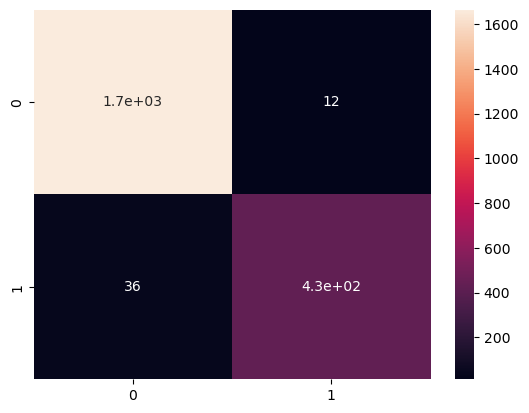

In [39]:
sns.heatmap(confusion_matrix(y_test_cv, rclf_cv.predict(x_test_cv)), annot=True)

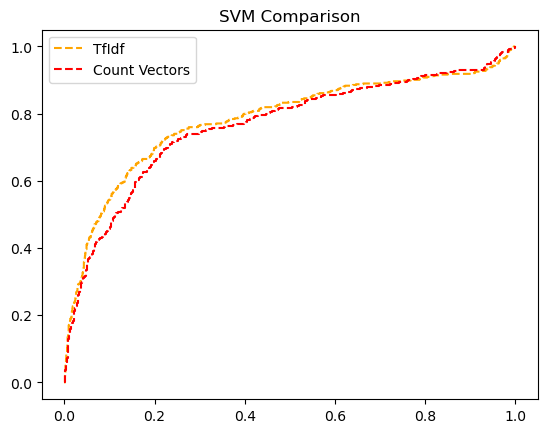

In [40]:
from sklearn.metrics import roc_curve,roc_auc_score
svc_tfidf_prob = svc.predict_proba(x_test_tf)
svc_cv_prob = svc_cf.predict_proba(x_test_cv)


fpr1, tpr1, thresh1 = roc_curve(y_test_tf, svc_tfidf_prob[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test_cv, svc_cv_prob[:,1], pos_label=1)


plt.plot(fpr1, tpr1, linestyle='--',color='orange',label="TfIdf")
plt.plot(fpr2, tpr2, linestyle='--',color='red',label="Count Vectors")
plt.title("SVM Comparison")

plt.legend()
plt.show()


In [41]:
svc_tfidf_auc = roc_auc_score(y_test_tf, svc_tfidf_prob[:,1])
svc_cv_auc = roc_auc_score(y_test_cv, svc_cv_prob[:,1])

print(svc_tfidf_auc, svc_cv_auc)

0.781956572739358 0.7637733844596053


#### Isolation Forest - TfIdf Vectors

In [103]:
from sklearn.ensemble import IsolationForest
isoforest_tfidf = IsolationForest()
isoforest_tfidf.fit(x_train_tf, y_train_tf)

IsolationForest()

In [104]:
print(classification_report(y_test_tf,isoforest_tfidf.predict(x_test_tf)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1690
           1       0.21      1.00      0.35       454

    accuracy                           0.21      2144
   macro avg       0.11      0.50      0.17      2144
weighted avg       0.04      0.21      0.07      2144



C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

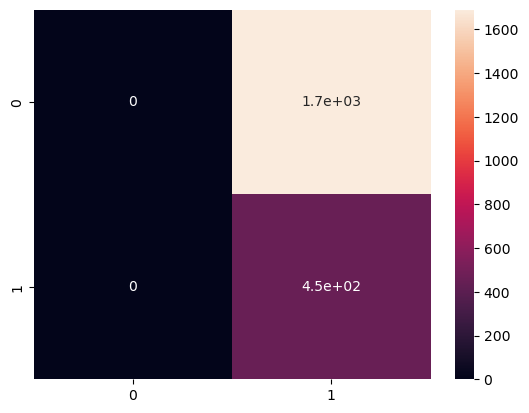

In [105]:
sns.heatmap(confusion_matrix(y_test_tf, isoforest_tfidf.predict(x_test_tf)), annot=True)

#### Isolation Forest - Count Vectors

In [106]:
from sklearn.ensemble import IsolationForest
isoforest_cv = IsolationForest()
isoforest_cv.fit(x_train_cv, y_train_cv)

IsolationForest()

In [107]:
print(classification_report(y_test_cv,isoforest_tfidf.predict(x_test_cv)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1677
           1       0.22      1.00      0.36       467

    accuracy                           0.22      2144
   macro avg       0.07      0.33      0.12      2144
weighted avg       0.05      0.22      0.08      2144



C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

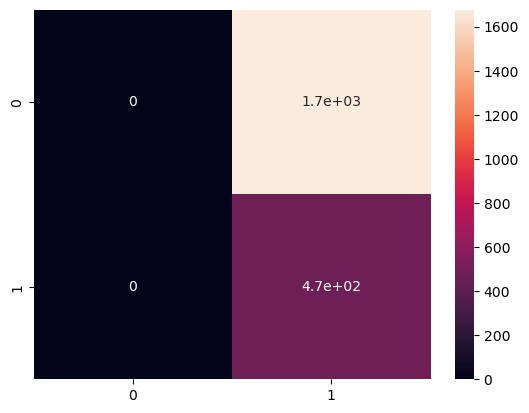

In [108]:
sns.heatmap(confusion_matrix(y_test_cv, isoforest_cv.predict(x_test_cv)), annot=True)

#### One Class SVM - TFIDF

In [111]:
from sklearn.svm import OneClassSVM

onec_svc_tfidf = OneClassSVM()
onec_svc_tfidf.fit(x_train_tf, y_train_tf)

OneClassSVM()

In [115]:
print(classification_report(y_test_tf,onec_svc_tfidf.predict(x_test_tf)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1690
           1       0.16      0.38      0.23       454

    accuracy                           0.08      2144
   macro avg       0.05      0.13      0.08      2144
weighted avg       0.03      0.08      0.05      2144



C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

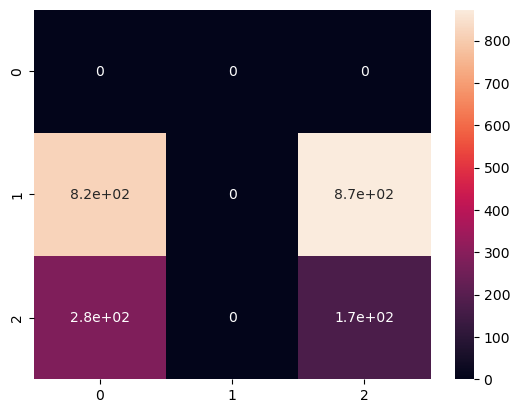

In [116]:
sns.heatmap(confusion_matrix(y_test_tf, onec_svc_tfidf.predict(x_test_tf)), annot=True)

#### One Class - Count Vectorizer

In [118]:
from sklearn.svm import OneClassSVM

onec_svc_cv = OneClassSVM()
onec_svc_cv.fit(x_train_cv, y_train_cv)

OneClassSVM()

In [119]:
print(classification_report(y_test_cv,onec_svc_cv.predict(x_test_cv)))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1677
           1       0.18      0.39      0.25       467

    accuracy                           0.09      2144
   macro avg       0.06      0.13      0.08      2144
weighted avg       0.04      0.09      0.05      2144



C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patel\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

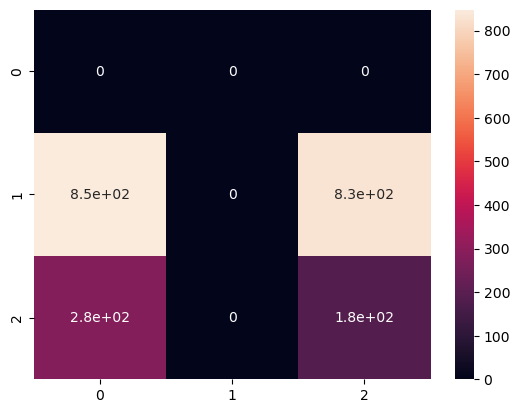

In [120]:
sns.heatmap(confusion_matrix(y_test_cv, onec_svc_cv.predict(x_test_cv)), annot=True)

#### KNN - TFIDF

In [77]:
from sklearn.decomposition import TruncatedSVD

# because PCA doesn't work with sparse matricies
# https://stackoverflow.com/questions/33603787/performing-pca-on-large-sparse-matrix-by-using-sklearn

x_tf_pca = TruncatedSVD(n_components=2)
x_tf_pca_data = x_tf_pca.fit_transform(X_CV)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_tf_pca_data, Y)

KNeighborsClassifier()

In [79]:
preds = knn.predict(x_tf_pca_data)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


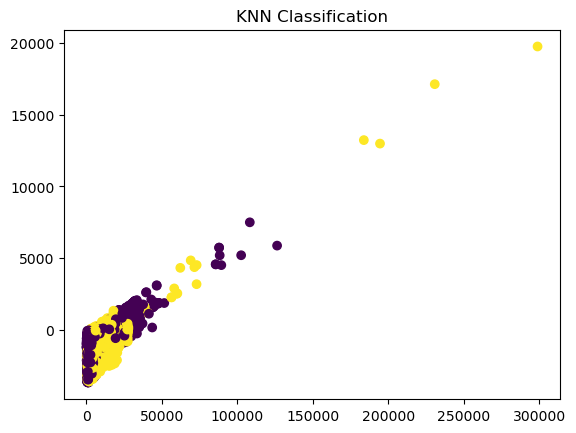

In [81]:
plt.scatter(x_tf_pca_data[:,0], x_tf_pca_data[:,-1], c=preds)
plt.title("KNN Classification")
plt.show()

## LIME - Model Interpretation

#### TFIDF

In [95]:
j = 1000

In [42]:
tf_cols = list(vectorizer.get_feature_names_out())
tf_cols.extend(features)

In [88]:
# Dont really know how to implement it so followed this notebook
# https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime#4.-Interpret-model-predictions-with-LIME-

import lime
import lime.lime_tabular

model_explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train_tf, 
    feature_names=tf_cols,
    class_names=['ham','spam'], 
    verbose=True, 
    mode='classification'
)

In [91]:
exp = model_explainer.explain_instance(x_test_tf[j], rclf.predict_proba)

Intercept 0.06
Prediction_local [0.06]
Right: 0.06


In [92]:
exp.show_in_notebook(show_table=True)

#### Count Vectorizer

In [94]:
cv_cols = list(count_vectorizer.get_feature_names_out())
cv_cols.extend(features)


cv_model_explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train_cv, 
    feature_names=cv_cols,
    class_names=['ham','spam'], 
    verbose=True, 
    mode='classification'
)

In [96]:
exp = model_explainer.explain_instance(x_train_cv[j], rclf_cv.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept 0.03
Prediction_local [0.03]
Right: 0.03


In [99]:
exp = model_explainer.explain_instance(x_train_cv[j], svc_cf.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept 0.6089128900142852
Prediction_local [0.60891289]
Right: 0.6089128900142852


### Conclusions

- The email distribution was 80-20 that added more bias on Ham emails
- Random forest seems to be performing well with tfidf and count vectorizer both 
- SVM's struggle with TfIdf preprocessed data but shows huge improvement with count vectorizer
- It's hard to interprete LIME because of the TFIDF encoded features names



- Tried unsupervised learning but upon plotting the points after dimension reduction they look linear not sure why
- The predictions didn't make sense

### Refrences

- https://stackoverflow.com/questions/48573174/how-to-combine-tfidf-features-with-other-features
- https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
- https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime#4.-Interpret-model-predictions-with-LIME-
- https://stackoverflow.com/questions/33603787/performing-pca-on-large-sparse-matrix-by-using-sklearn